<a href="https://colab.research.google.com/github/ddaci/RNP_5/blob/main/DEMO_CODE_TF2_Keras_MNIST_clasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify MNIST with CNN in Keras using TensorFlow 2.0

**@Catalin Caleanu, 2019**

Adapted from:

**[1] George Seif, A Quick Introduction to TensorFlow 2.0 for Deep Learning**

https://towardsdatascience.com/a-quick-introduction-to-tensorflow-2-0-for-deep-learning-e740ca2e974c

**[2] Adrian Rosebrock, "3 ways to create a Keras model with TensorFlow 2.0 (Sequential, Functional, and Model Subclassing"**

https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/

## Imports

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
# Check tf version
print(tf.__version__)
%matplotlib inline

2.0.0


## The Dataset

MNIST dataset which contains 60,000 training images and 10,000 test images of handwritten digits from 0 to 9, size 28x28.

## Loading data and visualisation

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Display the dimensions
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

train_images shape: (60000, 28, 28) train_labels shape: (60000,)


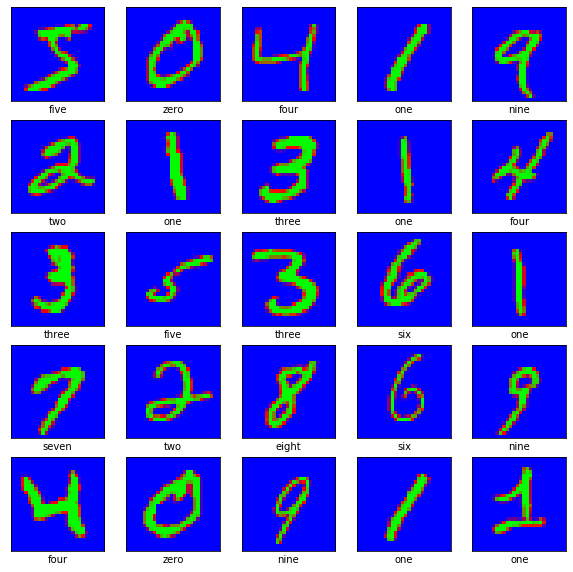

In [ ]:
# Define the text labels
mnist_labels = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

# Show first 25 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.brg)
    plt.xlabel(mnist_labels[train_labels[i]])
plt.show()

## Data normalization
Normalize the data dimensions so that they are of the same scale. Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1) as
# mnist.load_data() supplies the MNIST digits with structure (nb_samples, 28, 28)
# The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example
# They have 4-dimensional inputs and outputs. This covers colour images (nb_samples, nb_channels, width, height)

train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [ ]:
# Further break training data into train / validation sets
# put 5000 into validation set and keep remaining 55,000 for train)

(train_images, x_valid) = train_images[5000:], train_images[:5000]
(train_labels, y_valid) = train_labels[5000:], train_labels[:5000]

# Print training set shape
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

# Print the number of training, validation, and test datasets
print(train_images.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(test_images.shape[0], 'test set')

train_images shape: (55000, 28, 28, 1) train_labels shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Model Definition

Keras and TensorFlow 2.0 provide you with three methods to implement your own neural network architectures:

* **Sequential API**

    A sequential model, as the name suggests, allows you to create models layer-by-layer in a step-by-step fashion. Keras Sequential API is by far the easiest way to get up and running with Keras, but it’s also the most limited — you cannot create models that:
    * Share layers
    * Have branches (at least not easily)
    * Have multiple inputs
    * Have multiple outputs
   
   Examples of seminal sequential architectures that you may have already used or implemented include:
        * LeNet
        * AlexNet
        * VGGNet
    
    
* **Functional API**

    Keras’ Functional API is easy to use and is typically favored by most deep learning practitioners who use the Keras deep learning library. Using the Functional API you can:
    * Create more complex models.
    * Have multiple inputs and multiple outputs.
    * Easily define branches in your architectures (ex., an Inception block, ResNet block, etc.).
    * Design directed acyclic graphs (DAGs).
    * Easily share layers inside the architecture.
    **Furthermore, any Sequential model can be implemented using Keras’ Functional API.**

    Examples of models that have Functional characteristics (such as layer branching) include:
        * ResNet
        * GoogLeNet/Inception
        * Xception
        * SqueezeNet


* **Model subclassing**

![keras_3_model_types_header.png](../Assets/keras_3_model_types_header.png)
<center>Fig. 1. Keras models.</center>


In [ ]:
# Sequential API

IMG_SIZE = (28, 28, 1)
model = models.Sequential()

model.add(layers.Input(shape=IMG_SIZE))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(2, 2)))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(2, 2)))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(32))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          3

In [ ]:
# Functional API

IMG_SIZE = (28, 28, 1)
input_img = layers.Input(shape=IMG_SIZE)

model = layers.Conv2D(32, (3, 3), padding='same')(input_img)
model = layers.Activation('relu')(model)
model = layers.Conv2D(32, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)

model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(32)(model)
model = layers.Activation('relu')(model)
model = layers.Dense(10)(model)
output_img = layers.Activation('softmax')(model)

model = models.Model(input_img, output_img)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 64)        0     

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer
*   A loss function
*   A list of metrics


In [ ]:
#adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

## Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 97s 2ms/sample - loss: 0.4124 - accuracy: 0.8634 - val_loss: 0.0733 - val_accuracy: 0.9798
Epoch 2/3
55000/55000 [==============================] - 99s 2ms/sample - loss: 0.0858 - accuracy: 0.9734 - val_loss: 0.0719 - val_accuracy: 0.9800
Epoch 3/3
55000/55000 [==============================] - 91s 2ms/sample - loss: 0.0583 - accuracy: 0.9824 - val_loss: 0.0487 - val_accuracy: 0.9868


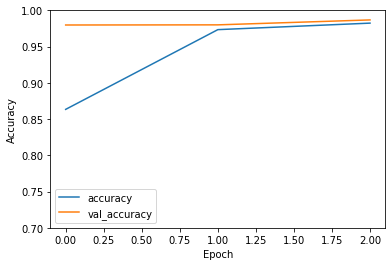

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

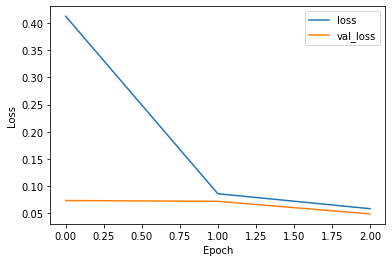

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(test_images, test_labels, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9854


## Visualize prediction
Now let's visualize the prediction using the model you just trained.
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

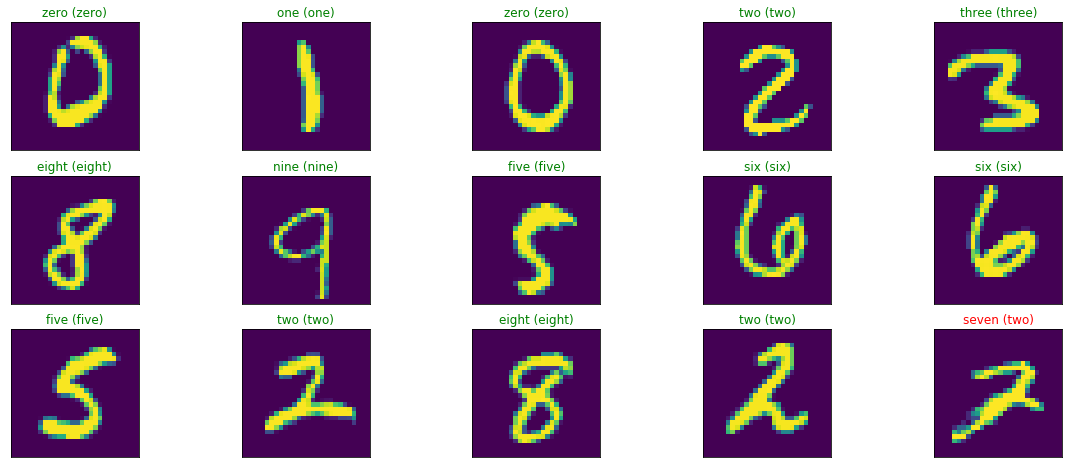

In [ ]:
y_hat = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_labels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(mnist_labels[predict_index],
                                  mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Congragulations!
You have successfully trained a CNN to classify MNIST.